In [1]:
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn import tree

In [4]:
from IPython.display import Image

In [5]:
import pandas as pd
import numpy as np

C:\ai\python\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ai\python\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [7]:
!pip install pydotplus

  Stored in directory: C:\Users\student\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [8]:
import pydotplus

In [9]:
import os

In [57]:
tennis_data=pd.read_csv("play_tennis.csv")
tennis_data

,Outlook,Humidity,Wind,PlayTennis
0,Sunny,High,Weak,No
1,Sunny,High,Strong,No
2,Overcast,High,Weak,Yes
3,Rain,High,Weak,Yes
4,Rain,Normal,Strong,Yes
5,Rain,Normal,Strong,No
6,Overcast,Normal,Weak,Yes
7,Sunny,High,Weak,No
8,Sunny,Normal,Weak,Yes
9,Rain,High,Weak,No


In [58]:
tennis_data.Outlook=tennis_data.Outlook.replace("Sunny",0)

In [59]:
tennis_data

,Outlook,Humidity,Wind,PlayTennis
0,0,High,Weak,No
1,0,High,Strong,No
2,Overcast,High,Weak,Yes
3,Rain,High,Weak,Yes
4,Rain,Normal,Strong,Yes
5,Rain,Normal,Strong,No
6,Overcast,Normal,Weak,Yes
7,0,High,Weak,No
8,0,Normal,Weak,Yes
9,Rain,High,Weak,No


In [60]:
tennis_data.Outlook=tennis_data.Outlook.replace("Overcast",1)
tennis_data

,Outlook,Humidity,Wind,PlayTennis
0,0,High,Weak,No
1,0,High,Strong,No
2,1,High,Weak,Yes
3,Rain,High,Weak,Yes
4,Rain,Normal,Strong,Yes
5,Rain,Normal,Strong,No
6,1,Normal,Weak,Yes
7,0,High,Weak,No
8,0,Normal,Weak,Yes
9,Rain,High,Weak,No


In [61]:
tennis_data.Outlook=tennis_data.Outlook.replace("Rain",2)
tennis_data

,Outlook,Humidity,Wind,PlayTennis
0,0,High,Weak,No
1,0,High,Strong,No
2,1,High,Weak,Yes
3,2,High,Weak,Yes
4,2,Normal,Strong,Yes
5,2,Normal,Strong,No
6,1,Normal,Weak,Yes
7,0,High,Weak,No
8,0,Normal,Weak,Yes
9,2,High,Weak,No


In [62]:
tennis_data.Humidity=tennis_data.Humidity.replace("High",1)
tennis_data.Humidity=tennis_data.Humidity.replace("Normal",2)

In [63]:
tennis_data.Wind=tennis_data.Wind.replace("Weak",1)
tennis_data.Wind=tennis_data.Wind.replace("Strong",2)

In [64]:
tennis_data.PlayTennis=tennis_data.PlayTennis.replace("No",1)
tennis_data.PlayTennis=tennis_data.PlayTennis.replace("Yes",2)

In [65]:
tennis_data

,Outlook,Humidity,Wind,PlayTennis
0,0,1,1,1
1,0,1,2,1
2,1,1,1,2
3,2,1,1,2
4,2,2,2,2
5,2,2,2,1
6,1,2,1,2
7,0,1,1,1
8,0,2,1,2
9,2,1,1,1


In [66]:
X = np.array(pd.DataFrame(tennis_data,
            columns=["Outlook",
                     "Humidity",
                      "Wind"])
            )
X    

array([[0, 1, 1],
       [0, 1, 2],
       [1, 1, 1],
       [2, 1, 1],
       [2, 2, 2],
       [2, 2, 2],
       [1, 2, 1],
       [0, 1, 1],
       [0, 2, 1],
       [2, 1, 1],
       [0, 2, 2],
       [1, 1, 1],
       [1, 2, 1],
       [2, 1, 2],
       [2, 1, 1],
       [1, 2, 2],
       [0, 1, 1]], dtype=int64)

In [67]:
y = np.array(
      pd.DataFrame(tennis_data,
                columns=["PlayTennis"])
    )
y

array([[1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [1]], dtype=int64)

In [82]:
X_train= X[0:14]
X_train

array([[0, 1, 1],
       [0, 1, 2],
       [1, 1, 1],
       [2, 1, 1],
       [2, 2, 2],
       [2, 2, 2],
       [1, 2, 1],
       [0, 1, 1],
       [0, 2, 1],
       [2, 1, 1],
       [0, 2, 2],
       [1, 1, 1],
       [1, 2, 1],
       [2, 1, 2]], dtype=int64)

In [69]:
X_test=X[14:]
X_test

array([[2, 1, 1],
       [1, 2, 2],
       [0, 1, 1]], dtype=int64)

In [83]:
y_train = y[0:14]
y_train

array([[1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [1]], dtype=int64)

In [84]:
y_test=y[14:]
y_test

array([[1],
       [2],
       [1]], dtype=int64)

In [85]:
dt_clf=DecisionTreeClassifier()

In [86]:
dt_clf=dt_clf.fit(X_train, y_train)

In [87]:
dt_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [88]:
os.pathsep

';'

In [89]:
os.environ["PATH"]+=";"+"C:/ai/program/Graphviz/bin/"

In [90]:
os.environ["PATH"]

'C:\\ai\\python\\anaconda3;C:\\ai\\python\\anaconda3\\Library\\mingw-w64\\bin;C:\\ai\\python\\anaconda3\\Library\\usr\\bin;C:\\ai\\python\\anaconda3\\Library\\bin;C:\\ai\\python\\anaconda3\\Scripts;C:\\ai\\python\\anaconda3\\bin;C:\\ai\\python\\anaconda3\\condabin;C:\\java\\Python37\\Scripts\\;C:\\java\\Python37\\;C:\\Program Files\\Java\\jdk1.8.0_231\\bin;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0\\;C:\\Windows\\System32\\OpenSSH\\;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\java\\apache-maven-3.6.2\\bin;C:\\Program Files\\Git\\cmd;C:\\Program Files (x86)\\Windows Kits\\8.1\\Windows Performance Toolkit\\;C:\\Users\\student\\AppData\\Local\\Microsoft\\WindowsApps;C:\\Program Files\\Bandizip\\;C:\\java\\Microsoft VS Code\\bin;C:\\Program Files\\Docker Toolbox;C:/ai/program/Graphviz/bin/;C:/ai/program/Graphviz/bin/;C:/ai/program/Graphviz/bin/;C:/ai/program/Graphviz/bin/'

In [91]:
dt_dot_data=tree.export_graphviz(dt_clf,
                    out_file=None,
                    feature_names=[
                        "Outlook","Hummidity",
                        "Wind"],
                    class_names=["No","Yes"],
                    filled=True,
                    rounded=True,
                    special_characters=True
                )

In [92]:
dt_dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<Hummidity &le; 1.5<br/>gini = 0.5<br/>samples = 14<br/>value = [7, 7]<br/>class = No>, fillcolor="#e5813900"] ;\n1 [label=<Outlook &le; 0.5<br/>gini = 0.469<br/>samples = 8<br/>value = [5, 3]<br/>class = No>, fillcolor="#e5813966"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<gini = 0.0<br/>samples = 3<br/>value = [3, 0]<br/>class = No>, fillcolor="#e58139ff"] ;\n1 -> 2 ;\n3 [label=<Outlook &le; 1.5<br/>gini = 0.48<br/>samples = 5<br/>value = [2, 3]<br/>class = Yes>, fillcolor="#399de555"] ;\n1 -> 3 ;\n4 [label=<gini = 0.0<br/>samples = 2<br/>value = [0, 2]<br/>class = Yes>, fillcolor="#399de5ff"] ;\n3 -> 4 ;\n5 [label=<Wind &le; 1.5<br/>gini = 0.444<br/>samples = 3<br/>value = [2, 1]<br/>class = No>, fillcolor="#e581397f"] ;\n3 -> 5 ;\n6 [label=<gini = 0.5<br/>samples = 2<br/>value = [1, 1]<br/>class = No>, fillcolor="#e

In [93]:
dt_graph=pydotplus.graph_from_dot_data(dt_dot_data)

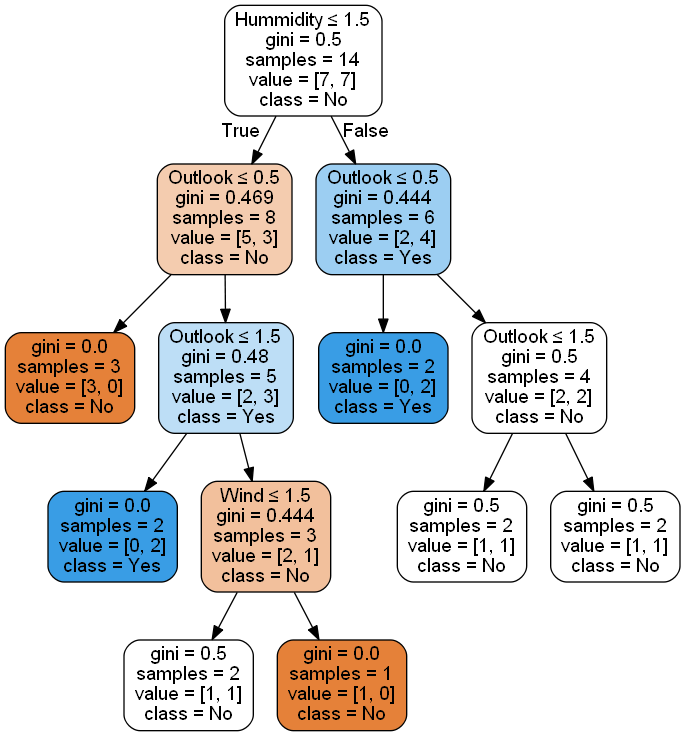

In [94]:
Image(dt_graph.create_png())

In [95]:
new_data=np.array(
            [
                #Outlook:Sunny,Humidity:High, Wind:Strong
                [0,1,2],
                #Outlook:Overcast, Humidity:Normal, Wind:Weak
                [1,2,1]
            ])

In [96]:
new_data

array([[0, 1, 2],
       [1, 2, 1]])

In [97]:
dt_clf.predict(new_data) #No, No

array([1, 1], dtype=int64)

In [98]:
dt_prediction=dt_clf.predict(X_test)
dt_prediction

array([1, 1, 1], dtype=int64)

In [99]:
y_test

array([[1],
       [2],
       [1]], dtype=int64)

In [100]:
confusion_matrix(y_test, dt_prediction)

array([[2, 0],
       [1, 0]], dtype=int64)

In [101]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, dt_prediction)
accuracy

0.6666666666666666